In [1]:
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.datasets import *

In [2]:
iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

iris_df['target'] = iris.target
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [3]:
features =  ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
X = iris_df[features].values
Y = iris_df['target'].values

In [4]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

def normalize(X):
        print("Mean and Standard Deviation Before")
        print(X.mean(axis=0), X.std(axis=0))

        #**********************************************
        ##### Standardize X part [feature wise scaling!!!!!]
        ##### and ensure that resultant data has mean around 0 and standard deviation 1 !!!
        sc=StandardScaler()
        XScaled = sc.fit_transform(X)
        #**********************************************

        print("Mean and Standard Deviation After")
        print(XScaled.mean(axis=0).round(4), XScaled.std(axis=0))
        return XScaled

XScaled = normalize(X)

Mean and Standard Deviation Before
[5.84333333 3.05733333 3.758      1.19933333] [0.82530129 0.43441097 1.75940407 0.75969263]
Mean and Standard Deviation After
[-0. -0. -0. -0.] [1. 1. 1. 1.]


In [5]:
from sklearn.model_selection import train_test_split

def splitTrainTest(X, Y, seed):
        #***************************************************************
        ######### SPLIT THE """"""XScaled""""""" AND """"""" Y """"""" into trainining and test partitions with 80%-20%split
        #<Fix a random state so that same partition is generated everytime>
        X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=seed)
        #****************************************************************
        print("Dimensions of Original Data:")
        print("Size(X):", X.shape, "; Size(Y)", Y.shape)
        print("Dimensions of Training Data:")
        print("Size(X_train):", X_train.shape, "; Size(Y_train)", Y_train.shape)
        print("Dimensions of Test Data:")
        print("Size(X_test):", X_test.shape, "; Size(Y_test)", Y_test.shape)
        return X_train, X_test, Y_train, Y_test

X_train, X_test, Y_train, Y_test = splitTrainTest(XScaled, Y, seed=2)

Dimensions of Original Data:
Size(X): (150, 4) ; Size(Y) (150,)
Dimensions of Training Data:
Size(X_train): (120, 4) ; Size(Y_train) (120,)
Dimensions of Test Data:
Size(X_test): (30, 4) ; Size(Y_test) (30,)


In [6]:
from sklearn.linear_model import LogisticRegression
LR_model=LogisticRegression()
LR_model.fit(X_train,Y_train)
y_pred_test=LR_model.predict(X_test)


In [7]:
y_pred_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 2, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [8]:
Y_test

array([0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1,
       2, 1, 1, 0, 0, 2, 0, 2])

In [9]:
((y_pred_test==Y_test).sum())/Y_test.shape[0]

0.9333333333333333

In [10]:
c=0
for i in range(y_pred_test.shape[0]):
    if(y_pred_test[i]==Y_test[i]):
        c=c+1
print("accuracy",c/Y_test.shape[0])

accuracy 0.9333333333333333


In [11]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
matrix1=confusion_matrix(matrix1,classnames=['setosa','versicolor','verginica'],show_normed=True,colorbar=True,show_absolute=True)
plt.show()

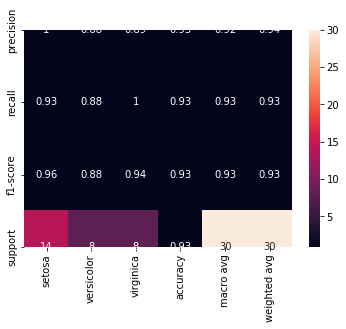

In [12]:
rep=metrics.classification_report(Y_test,y_pred_test,output_dict=True,target_names=iris.target_names)
rep_df=pd.DataFrame(rep)
sns.heatmap(rep_df,annot=True)

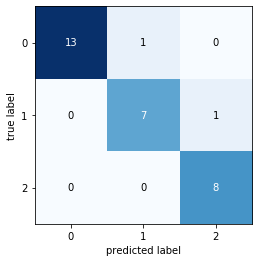

In [13]:
confusion_matrix = metrics.confusion_matrix(Y_test, y_pred_test)
plot_confusion_matrix(confusion_matrix )
plt.show()